MY NAME IS MINILA K M

In [77]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf 
from tensorflow.keras.layers import LSTM, Embedding, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam

In [57]:
data = pd.read_csv('C:/Users/Sys/Desktop/Oasis/Spam detection/spam.csv', encoding = 'latin-1')

In [58]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [59]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [62]:
import nltk
nltk.download()
from nltk.corpus import brown
brown.words()
from nltk.corpus import stopwords
from wordcloud import WordCloud

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


Spam


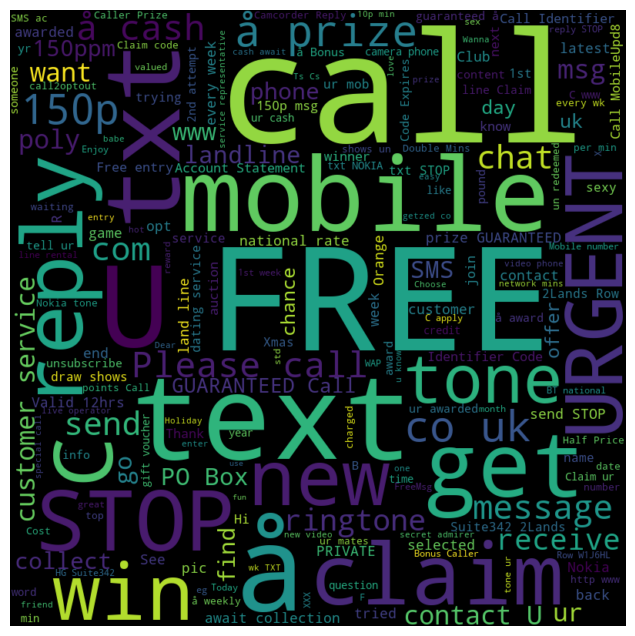

Ham


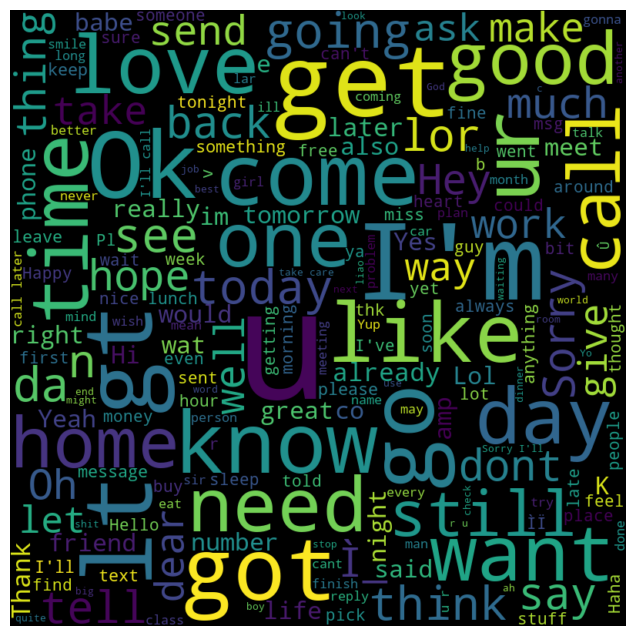

In [63]:
stop_words = set(stopwords.words('english'))

word_cloud = WordCloud(width = 800, height = 800, max_words = 200, stopwords = stop_words, background_color = 'black', max_font_size = 200)
spam = data.query("v1 == 'spam'").v2.str.cat(sep = ' ')
ham = data.query("v1 == 'ham'").v2.str.cat(sep = ' ')


print('Spam')
word_cloud.generate(spam)
plt.figure(figsize=(16, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

print('Ham')
word_cloud.generate(ham)
plt.figure(figsize=(16, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [64]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [65]:
data['v1'] = le.fit_transform(data['v1'])

In [66]:
data 

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,0,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,0,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,0,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [67]:
import re
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

In [68]:
def preprocessing(content):
    content = content.lower()
    tokens = nltk.word_tokenize(content)
    tokens = [re.sub(r'[^a-zA-Z0-9]', '', token) for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [stemmer.stem(token) for token in tokens]
    final = ' '.join(tokens)
    return final

In [69]:
data.v2 = [preprocessing(content) for content in data.v2]
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,go jurong point crazi avail bugi n great world...,NaN,NaN,NaN
1,0,ok lar joke wif u oni,NaN,NaN,NaN
2,1,free entri 2 wkli comp win fa cup final tkt 21...,NaN,NaN,NaN
3,0,u dun say earli hor u c alreadi say,NaN,NaN,NaN
4,0,nah think goe usf live around though,NaN,NaN,NaN
...,...,...,...,...,...
5567,1,2nd time tri 2 contact u pound prize 2 claim e...,NaN,NaN,NaN
5568,0,b go esplanad fr home,NaN,NaN,NaN
5569,0,piti mood suggest,NaN,NaN,NaN
5570,0,guy bitch act like interest buy someth els nex...,NaN,NaN,NaN


In [70]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['v2'])

X = tokenizer.texts_to_sequences(data['v2'])
X = pad_sequences(X, maxlen=100)

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, data['v1'], test_size=0.2, random_state=42)

In [72]:
i = Input(shape=(100,))
x = Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=64, input_length=100)(i)
x = LSTM(64)(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)


In [73]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [74]:
history = model.fit(X_train, Y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
112/112 [==============================] - 12s 73ms/step - loss: 0.2463 - accuracy: 0.9156 - val_loss: 0.0873 - val_accuracy: 0.9731
Epoch 2/5
112/112 [==============================] - 8s 68ms/step - loss: 0.0366 - accuracy: 0.9905 - val_loss: 0.0711 - val_accuracy: 0.9798
Epoch 3/5
112/112 [==============================] - 7s 66ms/step - loss: 0.0143 - accuracy: 0.9969 - val_loss: 0.0693 - val_accuracy: 0.9798
Epoch 4/5
112/112 [==============================] - 8s 67ms/step - loss: 0.0052 - accuracy: 0.9992 - val_loss: 0.0951 - val_accuracy: 0.9776
Epoch 5/5
112/112 [==============================] - 7s 66ms/step - loss: 0.0024 - accuracy: 0.9997 - val_loss: 0.0852 - val_accuracy: 0.9776


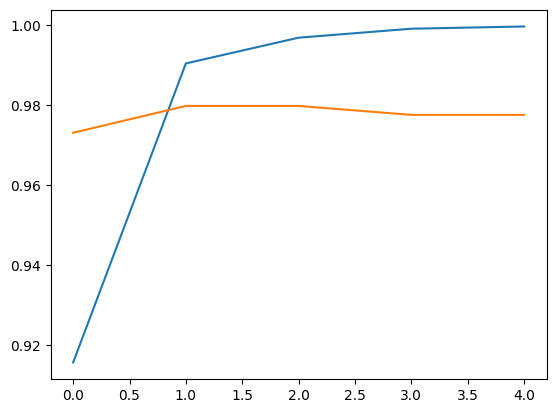

In [75]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [76]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

35/35 [==============================] - 1s 22ms/step - loss: 0.0834 - accuracy: 0.9731
Test Loss: 0.08337975293397903, Test Accuracy: 0.9730941653251648
